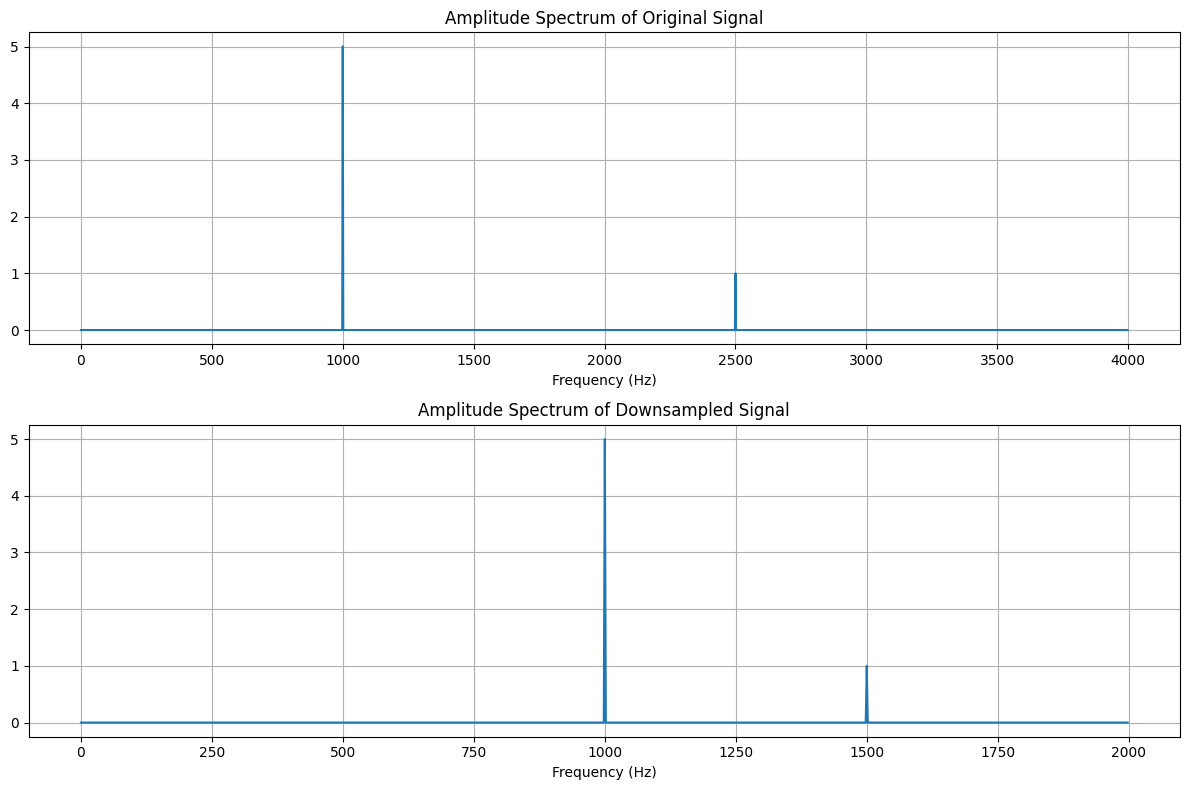

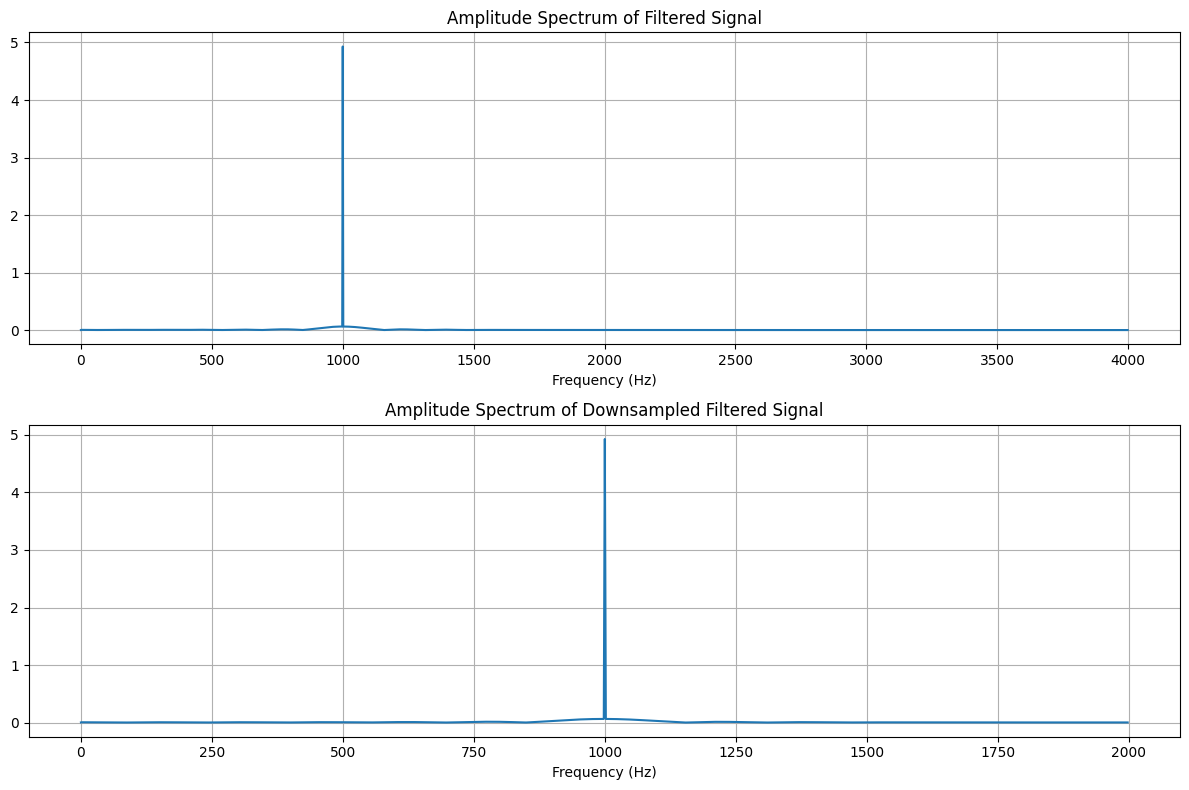

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Downsampling filter coefficients
B = np.array([ 3.59810719e-04,  4.85152485e-04, -1.22140300e-18, -5.51059377e-04,
       -4.61749329e-04,  2.77255040e-04,  8.11721566e-04,  3.50339606e-04,
       -7.33001510e-04, -1.08649073e-03,  7.19282356e-18,  1.39801993e-03,
        1.21125089e-03, -7.40454911e-04, -2.18014465e-03, -9.37542307e-04,
        1.94138833e-03,  2.83487852e-03, -5.02629891e-18, -3.51319015e-03,
       -2.98232250e-03,  1.78613837e-03,  5.15442198e-03,  2.17422423e-03,
       -4.42079677e-03, -6.34655736e-03,  8.30873056e-18,  7.63494539e-03,
        6.40090395e-03, -3.79254733e-03, -1.08471991e-02, -4.54368239e-03,
        9.19339468e-03,  1.31633457e-02, -1.14868009e-17, -1.58738607e-02,
       -1.33839152e-02,  8.00343654e-03,  2.31983706e-02,  9.89613027e-03,
       -2.05125351e-02, -3.03090831e-02,  1.37742979e-17,  4.01369570e-02,
        3.62695646e-02, -2.37930060e-02, -7.83586625e-02, -4.02378207e-02,
        1.12033000e-01,  2.93555396e-01,  3.74671150e-01,  2.93555396e-01,
        1.12033000e-01, -4.02378207e-02, -7.83586625e-02, -2.37930060e-02,
        3.62695646e-02,  4.01369570e-02,  1.37742979e-17, -3.03090831e-02,
       -2.05125351e-02,  9.89613027e-03,  2.31983706e-02,  8.00343654e-03,
       -1.33839152e-02, -1.58738607e-02, -1.14868009e-17,  1.31633457e-02,
        9.19339468e-03, -4.54368239e-03, -1.08471991e-02, -3.79254733e-03,
        6.40090395e-03,  7.63494539e-03,  8.30873056e-18, -6.34655736e-03,
       -4.42079677e-03,  2.17422423e-03,  5.15442198e-03,  1.78613837e-03,
       -2.98232250e-03, -3.51319015e-03, -5.02629891e-18,  2.83487852e-03,
        1.94138833e-03, -9.37542307e-04, -2.18014465e-03, -7.40454911e-04,
        1.21125089e-03,  1.39801993e-03,  7.19282356e-18, -1.08649073e-03,
       -7.33001510e-04,  3.50339606e-04,  8.11721566e-04,  2.77255040e-04,
       -4.61749329e-04, -5.51059377e-04, -1.22140300e-18,  4.85152485e-04,
        3.59810719e-04])

#B = np.array([0.00074961181416, 0.00247663033476, 0.00146938649416, -0.00440446121505,
#              -0.00910635730662, 0.00000000000000, 0.02035676831506, 0.02233710562885,
#              -0.01712963672810, -0.06376620649567, -0.03590670035210, 0.10660980550088,
#              -0.29014909103794, 0.37500000000000, 0.29014909103794, 0.10660980550088,
#              -0.03590670035210, -0.06376620649567, -0.01712963672810, 0.02233710562885,
#              -0.02035676831506, 0.00000000000000, -0.00910635730662, -0.00440446121505,
#              -0.00146938649416, 0.00247663033476, 0.00074961181416])

# Generate the 2048 samples
fs = 8000  # Sampling rate
N = 4096  # Number of samples
M = 2  # Downsample factor
n = np.arange(N)
x = 5 * np.sin(n * np.pi / 4) + np.cos(5 * n * np.pi / 8)

# Compute the single-sided amplitude spectrum
X = 2 * np.abs(np.fft.fft(x, N)) / N
X[0] = X[0] / 2

# Map the frequency index up to the folding frequency in Hz
f = np.arange(N // 2) * fs / N

# Downsampling
y = x[::M]
NM = len(y)

# Compute the single-sided amplitude spectrum for the downsampled signal
Y = 2 * np.abs(np.fft.fft(y, NM)) / NM
Y[0] = Y[0] / 2

# Map the frequency index to the frequency in Hz for the downsampled signal
fsM = np.arange(NM // 2) * (fs / M) / NM

# Plot the amplitude spectra of the original and downsampled signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(f, X[:N // 2])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.title('Amplitude Spectrum of Original Signal')

plt.subplot(2, 1, 2)
plt.plot(fsM, Y[:NM // 2])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.title('Amplitude Spectrum of Downsampled Signal')

plt.tight_layout()
plt.show()

# Anti-aliasing filtering
w = lfilter(B, 1, x)

# Compute the single-sided amplitude spectrum for the filtered signal
W = 2 * np.abs(np.fft.fft(w, N)) / N
W[0] = W[0] / 2

# Downsampling the filtered signal
y_filtered = w[::M]
NM_filtered = len(y_filtered)

# Compute the single-sided amplitude spectrum for the downsampled filtered signal
Y_filtered = 2 * np.abs(np.fft.fft(y_filtered, NM_filtered)) / NM_filtered
Y_filtered[0] = Y_filtered[0] / 2

# Plot the amplitude spectra of the filtered and downsampled filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(f, W[:N // 2])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.title('Amplitude Spectrum of Filtered Signal')

plt.subplot(2, 1, 2)
plt.plot(fsM, Y_filtered[:NM_filtered // 2])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.title('Amplitude Spectrum of Downsampled Filtered Signal')

plt.tight_layout()
plt.show()
